In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv as csv

In [2]:
# read event data  for game_id and return as a DataFrame
def read_event_data(DATADIR,game_id):
    eventfile = '/Sample_Game_%d/Sample_Game_%d_RawEventsData.csv' % (game_id,game_id) # filename
    events = pd.read_csv('{}/{}'.format(DATADIR, eventfile)) # read data
    return events

In [3]:
# set up initial path to data
DATADIR = "/Users/gkrish/Documents/Football Performance Analysis/sample-data-master/data/"
game_id = 2

In [4]:
# read in the event data
events = read_event_data(DATADIR,game_id)

In [5]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [6]:
# count the number of each event type in the data
print(events['Type'].value_counts())

Type
PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: count, dtype: int64


In [7]:
#changing the coordinate system
def to_metric_coordinates(data,field_dimen=(106.,68.) ):
    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = ( data[x_columns]-0.5 ) * field_dimen[0]
    data[y_columns] = -1 * ( data[y_columns]-0.5 ) * field_dimen[1]
    return data

In [9]:
#unit conversion from metric data(range 0 - 1 starting from top right) units to meters
events = to_metric_coordinates(events)

In [10]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [11]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

In [13]:
# Frequency of each event type by team
print(home_events['Type'].value_counts())
print(away_events['Type'].value_counts())

Type
PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: count, dtype: int64
Type
PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: count, dtype: int64


In [14]:
def plot_pitch( field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20):
    fig,ax = plt.subplots(figsize=(12,8)) # create a figure 
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax


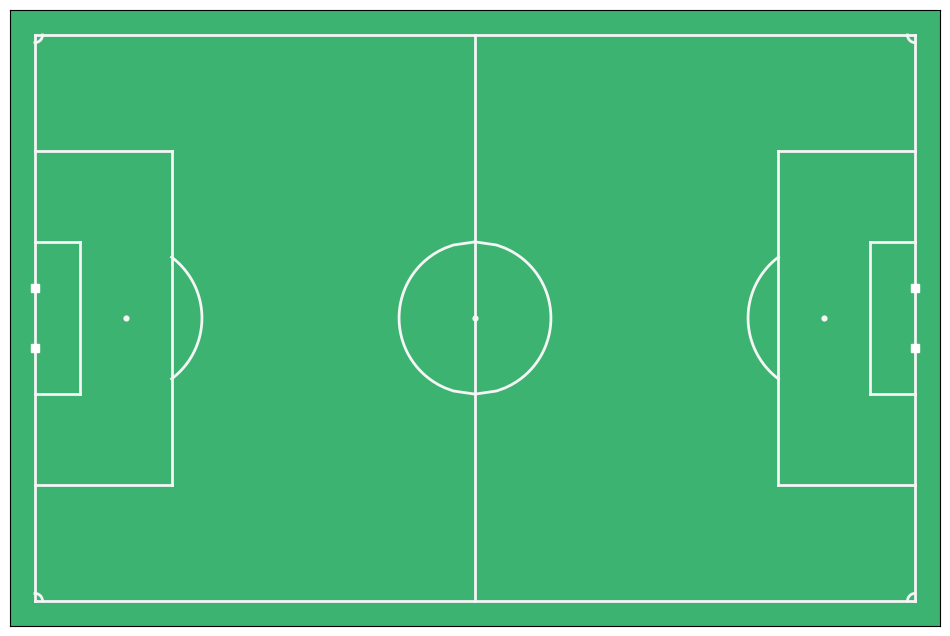

In [25]:
fig,ax = plot_pitch()

In [19]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [20]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [21]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [22]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [116]:
away_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72


In [121]:
ax.annotate?

In [117]:
events.loc[198][['End X','End Y']]

End X   -54.06
End Y    -2.04
Name: 198, dtype: object

In [118]:
events.loc[198][['Start X','Start Y']]

Start X   -47.7
Start Y    -3.4
Name: 198, dtype: object

Text(-47.7, -3.400000000000003, '')

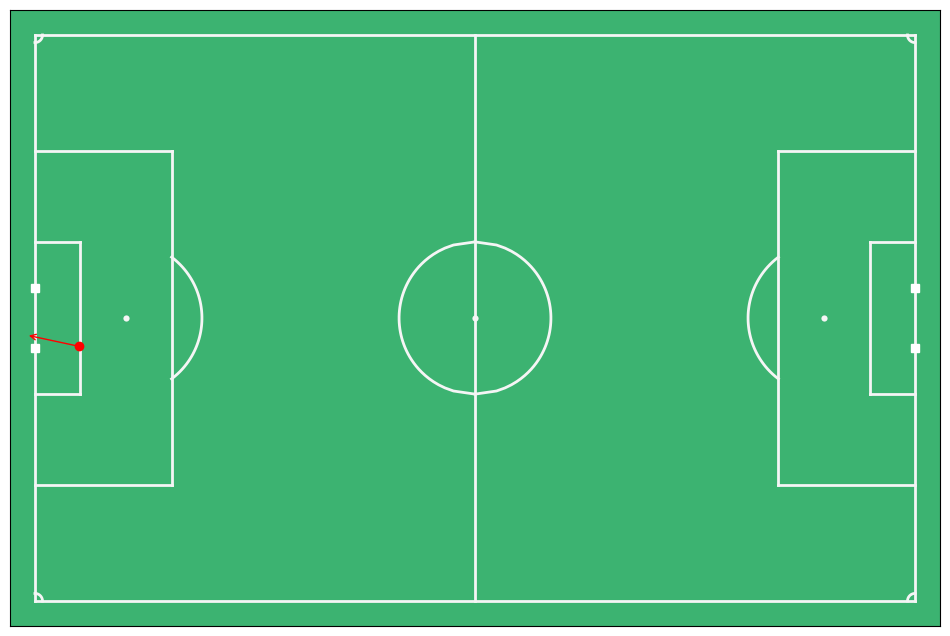

In [29]:
# Plot the first goal
fig,ax = plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))


In [39]:
events.iterrows

<bound method DataFrame.iterrows of       Team       Type       Subtype  Period  Start Frame  Start Time [s]  \
0     Away  SET PIECE      KICK OFF       1           51            2.04   
1     Away       PASS           NaN       1           51            2.04   
2     Away       PASS           NaN       1          146            5.84   
3     Away       PASS           NaN       1          248            9.92   
4     Away       PASS           NaN       1          316           12.64   
...    ...        ...           ...     ...          ...             ...   
1930  Away  BALL LOST  INTERCEPTION       2       140122         5604.88   
1931  Home  CHALLENGE   AERIAL-LOST       2       140180         5607.20   
1932  Away  CHALLENGE   AERIAL-LOST       2       140183         5607.32   
1933  Home   RECOVERY           NaN       2       140211         5608.44   
1934  Home   BALL OUT     CLEARANCE       2       140265         5610.60   

      End Frame  End Time [s]      From        To  

In [37]:
df

<generator object DataFrame.iterrows at 0x124ddadc0>

In [50]:
def plot_events( events, figax=None, field_dimen = (106.0,68), indicators = ['Marker','Arrow'], color='r', marker_style = 'o', alpha = 0.5, annotate=False):
    
    fig,ax = plot_pitch( field_dimen = field_dimen )
    
    for i,row in events.iterrows():
        if 'Marker' in indicators:
            ax.plot(  row['Start X'], row['Start Y'],color+marker_style,alpha=alpha )
        if 'Arrow' in indicators:
            ax.annotate("", xy=row[['End X','End Y']], xytext=row[['Start X','Start Y']], alpha=alpha, arrowprops=dict(alpha=alpha,width=0.5,headlength=4.0,headwidth=4.0,color=color),annotation_clip=True)
    return fig,ax

In [124]:
events.loc[180:198]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
180,Home,PASS,NaN,1,11275,451.00,11318,452.72,Player4,Player8,-11.66,-8.16,-22.26,-31.96
181,Home,PASS,NaN,1,11387,455.48,11417,456.68,Player8,Player4,-26.50,-29.92,-19.08,-23.12
182,Home,BALL LOST,INTERCEPTION,1,11441,457.64,11476,459.04,Player4,NaN,-19.08,-22.44,-28.62,14.28
183,Away,RECOVERY,INTERCEPTION,1,11478,459.12,11478,459.12,Player22,NaN,-27.56,10.88,NaN,NaN
184,Home,CHALLENGE,GROUND-LOST,1,11517,460.68,11517,460.68,Player5,NaN,-26.50,6.80,NaN,NaN
185,Away,CHALLENGE,GROUND-WON,1,11519,460.76,11519,460.76,Player22,NaN,-27.56,7.48,NaN,NaN
186,Away,CHALLENGE,TACKLE-LOST,1,11534,461.36,11534,461.36,Player22,NaN,-26.50,6.12,NaN,NaN
187,Away,BALL LOST,THEFT,1,11534,461.36,11534,461.36,Player22,NaN,-26.50,6.12,NaN,NaN
188,Home,CHALLENGE,TACKLE-WON,1,11641,465.64,11641,465.64,Player7,NaN,-13.78,-0.68,NaN,NaN
189,Home,RECOVERY,THEFT,1,11641,465.64,11641,465.64,Player7,NaN,-13.78,-0.68,NaN,NaN


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

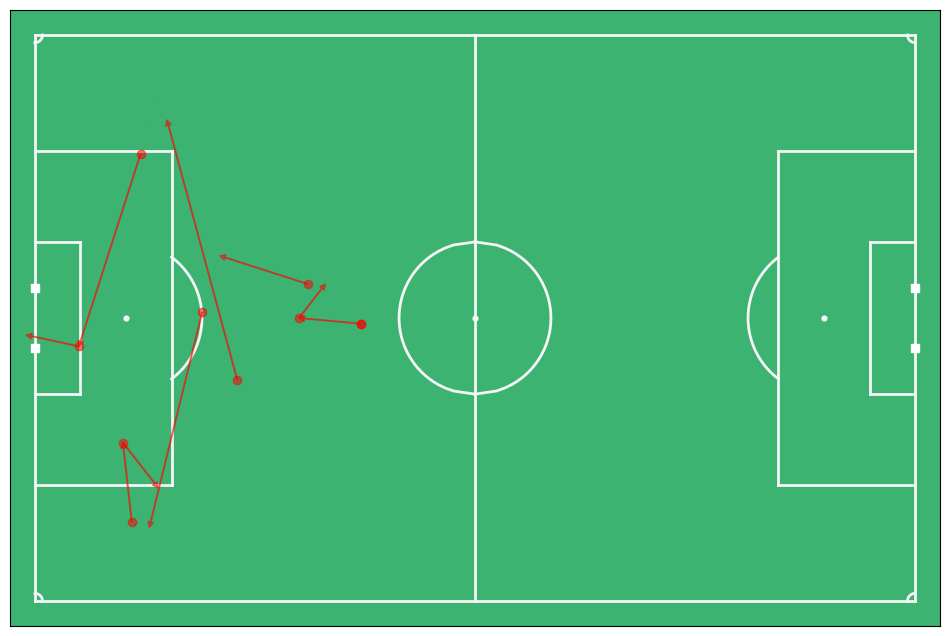

In [125]:
# plot passing move in run up to goal
plot_events( events.loc[189:198], indicators = ['Marker','Arrow'] )

In [58]:
teamfile = '/Sample_Game_%d/Sample_Game_%d_RawTrackingData_%s_Team.csv' % (game_id,game_id,'Home')

In [70]:
csvfile =  open('{}/{}'.format(DATADIR, teamfile), 'r')

In [71]:
reader = csv.reader(csvfile)

In [72]:
next(reader)[3].lower()

'home'

In [74]:
csvfile =  open('{}/{}'.format(DATADIR, teamfile), 'r') # create a csv file reader
reader = csv.reader(csvfile) 
teamnamefull = next(reader)[3].lower()

In [75]:
teamnamefull

'home'

In [76]:
jerseys = [x for x in next(reader) if x != '']

In [81]:
type(jerseys)

list

In [78]:
columns = next(reader)

In [79]:
columns

['Period',
 'Frame',
 'Time [s]',
 'Player11',
 '',
 'Player1',
 '',
 'Player2',
 '',
 'Player3',
 '',
 'Player4',
 '',
 'Player5',
 '',
 'Player6',
 '',
 'Player7',
 '',
 'Player8',
 '',
 'Player9',
 '',
 'Player10',
 '',
 'Player12',
 '',
 'Player13',
 '',
 'Player14',
 '',
 'Ball',
 '']

In [82]:
#Tracking data
def tracking_data(DATADIR,game_id,teamname):
    teamfile = '/Sample_Game_%d/Sample_Game_%d_RawTrackingData_%s_Team.csv' % (game_id,game_id,teamname)
    # First:  deal with file headers so that we can get the player names correct
    csvfile =  open('{}/{}'.format(DATADIR, teamfile), 'r') # create a csv file reader
    reader = csv.reader(csvfile) 
    teamnamefull = next(reader)[3].lower()
    print("Reading team: %s" % teamnamefull)
    # construct column names
    jerseys = [x for x in next(reader) if x != ''] # extract player jersey numbers from second row
    columns = next(reader)
    for i, j in enumerate(jerseys): # create x & y position column headers for each player
        columns[i*2+3] = "{}_{}_x".format(teamname, j)
        columns[i*2+4] = "{}_{}_y".format(teamname, j)
    columns[-2] = "ball_x" # column headers for the x & y positions of the ball
    columns[-1] = "ball_y"
    # Second: read in tracking data and place into pandas Dataframe
    tracking = pd.read_csv('{}/{}'.format(DATADIR, teamfile), names=columns, index_col='Frame', skiprows=3)
    return tracking

In [84]:
#reading tracking data
tracking_home = tracking_data(DATADIR,game_id,'Home')
tracking_away = tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [85]:
print( tracking_home.columns )

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [86]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
tracking_home.shape

(141156, 32)

In [90]:
.04*25

1.0

In [87]:
# Convert positions from metrica units to meters 
tracking_home = to_metric_coordinates(tracking_home)
tracking_away = to_metric_coordinates(tracking_away)

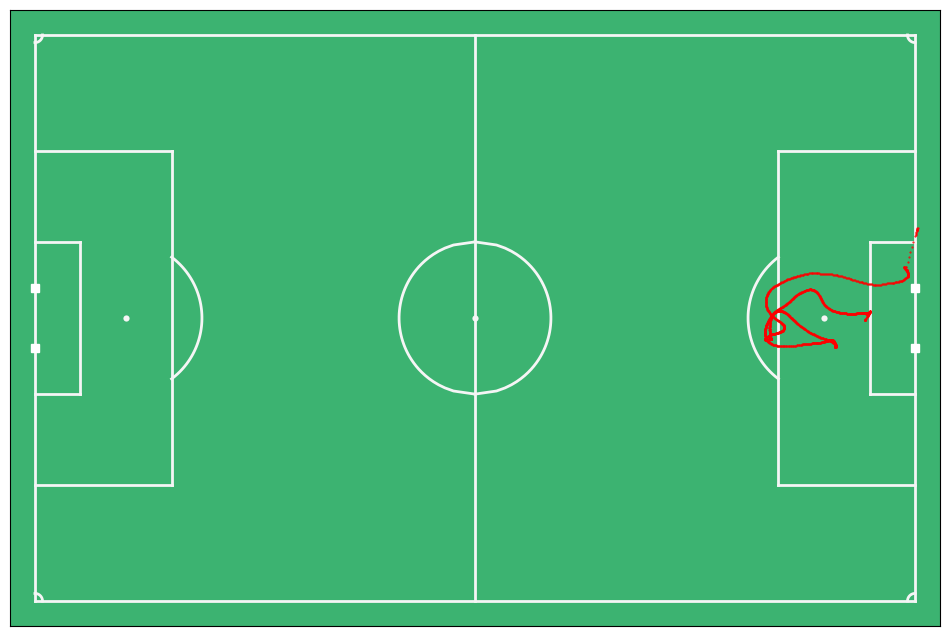

In [91]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)


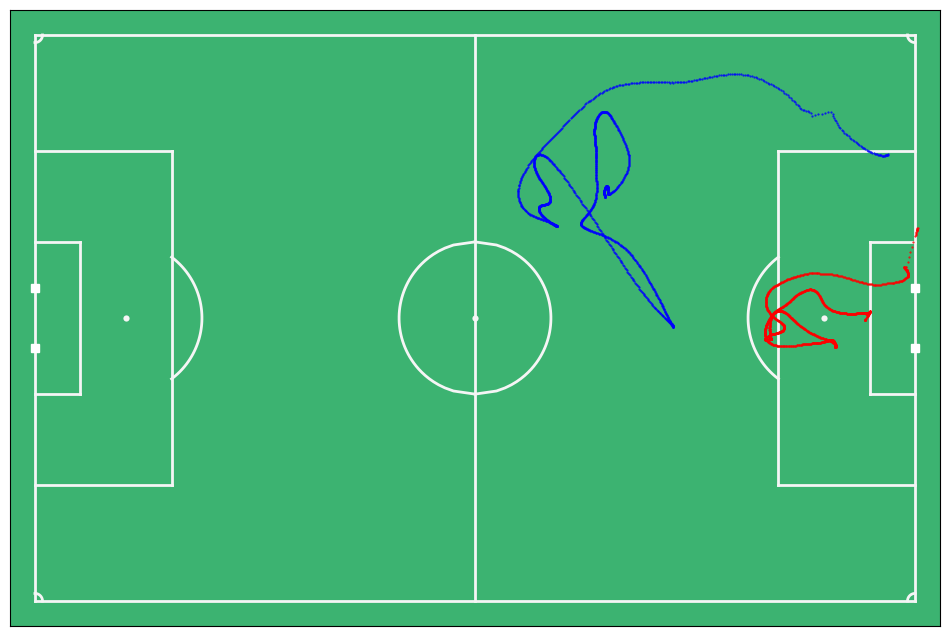

In [95]:
fig,ax = plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)

In [127]:
team_colors=('r','b')
for team,color in zip( [tracking_home,tracking_away], team_colors) :
    print(team.keys())

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')
Index(['Period', 'Time [s]', 'Away_25_x', 'Away_25_y', 'Away_15_x',
       'Away_15_y', 'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y',
       'Away_18_x', 'Away_18_y', 'Away_19_x', 'Away_19_y', 'Away_20_x',
       'Away_20_y', 'Away_21_x', 'Away_21_y', 'Away_22_x', 'Away_22_y',
       'Away_23_x', 'Away_23_y', 'Away_24_x', 'Away_24_y', 'Away_26_x',
       'Away_26_y', 'ball_x', 'ball_y'],
      dtype='object')


In [132]:
ax.plot?

In [130]:
def plot_frame( hometeam, awayteam, figax=None, team_colors=('r','b'), field_dimen = (106.0,68.0), PlayerMarkerSize=10, PlayerAlpha=0.7):
    fig,ax = plot_pitch( field_dimen = field_dimen )
    

    for team,color in zip( [hometeam,awayteam], team_colors) :
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
        ax.plot( team[x_columns], team[y_columns], color+'o', markersize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
        
    # plot ball
    ax.plot( hometeam['ball_x'], hometeam['ball_y'],'ko', markersize=6, alpha=1.0, linewidth=0)
    return fig,ax

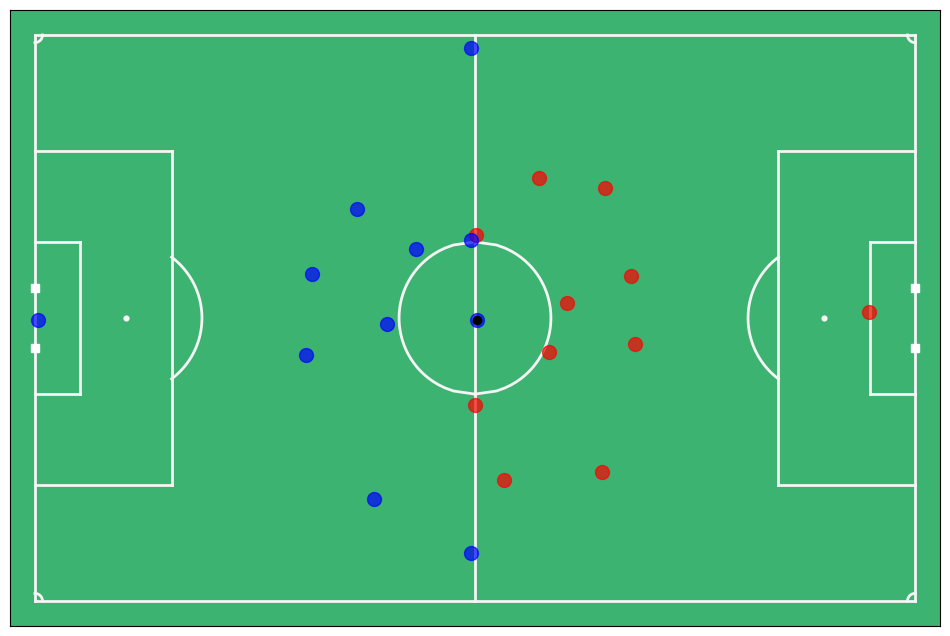

In [133]:
#player positions at kick-off
kickoff = events.loc[0]['Start Frame']
fig,ax = plot_frame( tracking_home.loc[kickoff], tracking_away.loc[kickoff] )

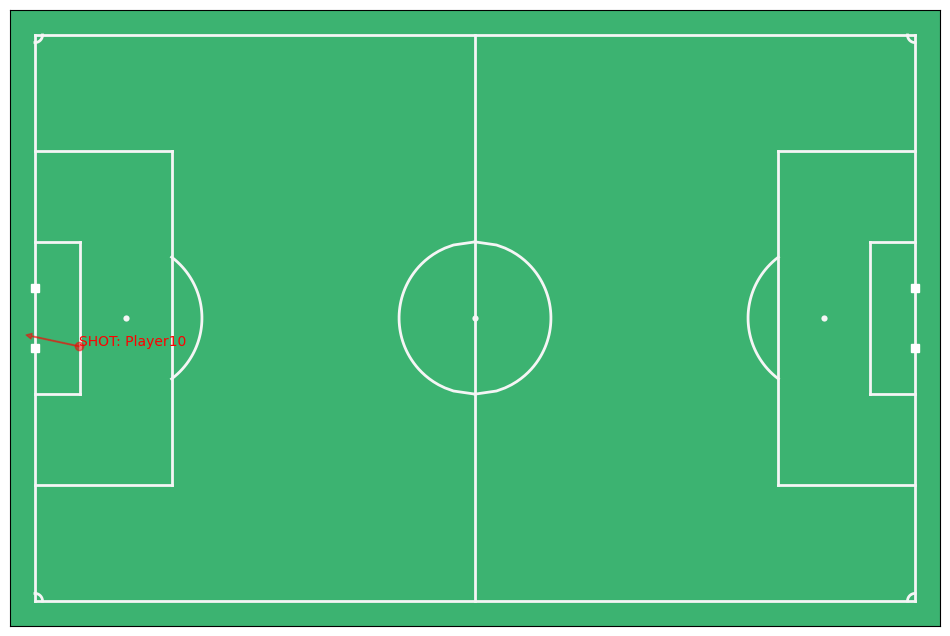

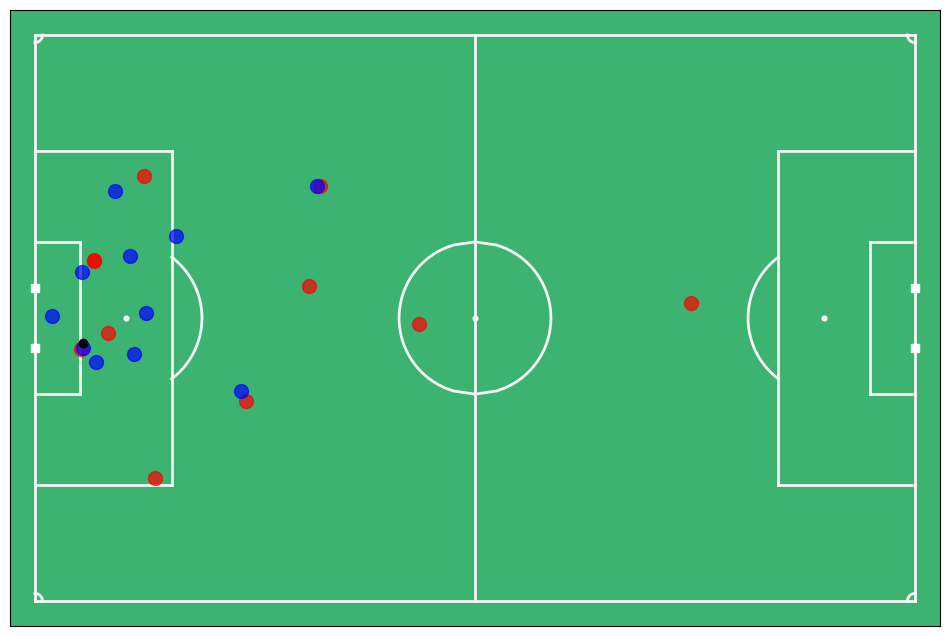

In [135]:
#player positions at first goal
fig,ax = plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

